In [1]:
import matplotlib.pyplot as plt
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd

In [2]:
audio_file_piano='piano_c.wav'

In [3]:
#Loading the audio files
audio,sr=librosa.load(audio_file_piano)

In [4]:
#Play the audio files
ipd.Audio(audio_file_piano)

In [5]:
#Identify the sampling rate
sr

22050

In [6]:
#Number of samples in the recording
#Length of the numpy array gives us the number of samples in total
s=len(audio)
s

33968

In [7]:
#Duration of the audio
#Duration=Number of samples/sampling rate
s/sr

1.540498866213152

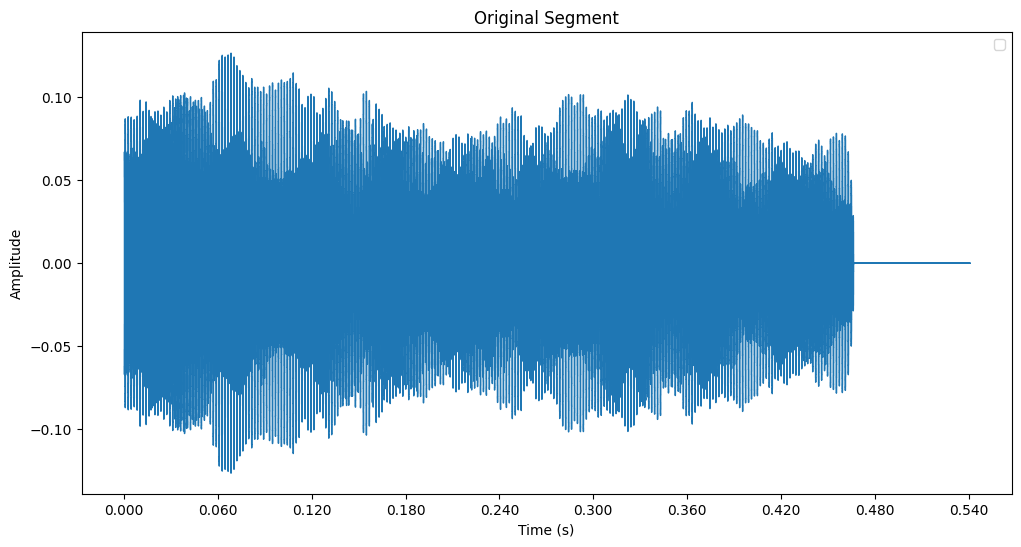

In [8]:
#Visualize the audio in time domain
start_time = 1
duration = 2
audio_segment = audio[int(start_time * sr):int((start_time + duration) * sr)]



plt.figure(figsize=(12, 6))

librosa.display.waveshow(audio_segment, sr=sr)
plt.title('Original Segment')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

1st Set Question

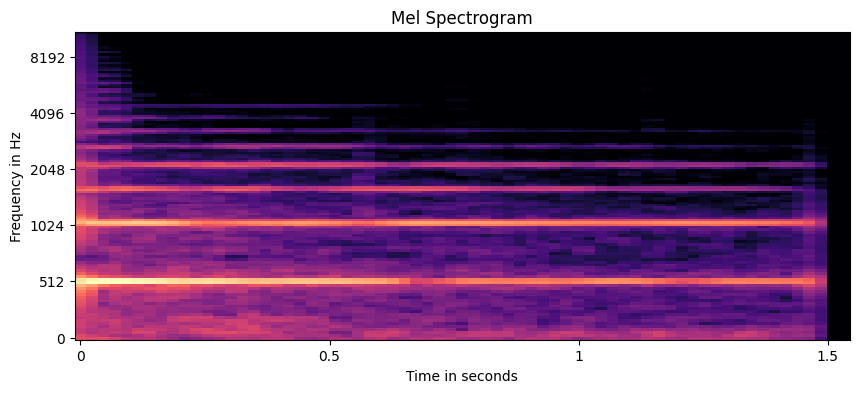

In [13]:
#Calculating and visualizing spectogram
spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr)


spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)

plt.figure(figsize=(10, 4))
librosa.display.specshow(spectrogram_db, sr=sr, x_axis='time', y_axis='mel')
plt.title('Mel Spectrogram')
plt.xlabel('Time in seconds')
plt.ylabel('Frequency in Hz')
plt.show()


In [14]:
#Calculate and plot the mfcc, first and second order derivatives
mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
mfcc

array([[-9.46044922e+01, -1.37197144e+02, -2.06279892e+02,
        -2.09904800e+02, -2.37407166e+02, -2.61250885e+02,
        -2.70652435e+02, -2.77259338e+02, -2.77422089e+02,
        -2.76795868e+02, -2.84633423e+02, -2.85257721e+02,
        -2.83714569e+02, -2.90603088e+02, -2.90709442e+02,
        -2.95096191e+02, -3.05621613e+02, -3.09708618e+02,
        -3.15314819e+02, -3.19879486e+02, -3.21055176e+02,
        -3.22180511e+02, -3.28197632e+02, -3.34771332e+02,
        -3.18894501e+02, -3.16342743e+02, -3.37598450e+02,
        -3.44286469e+02, -3.53087402e+02, -3.55355804e+02,
        -3.48730957e+02, -3.48042999e+02, -3.49733093e+02,
        -3.48037445e+02, -3.45214539e+02, -3.51136475e+02,
        -3.55866211e+02, -3.64639099e+02, -3.66760010e+02,
        -3.64363434e+02, -3.70817596e+02, -3.75743866e+02,
        -3.74638397e+02, -3.76084045e+02, -3.81626556e+02,
        -3.86825989e+02, -3.87938873e+02, -3.84906982e+02,
        -3.82974884e+02, -3.81885315e+02, -3.82986359e+0

In [15]:
delta_mfcc = librosa.feature.delta(mfcc,order=1)
delta_mfcc

delta2_mfcc = librosa.feature.delta(mfcc, order=2)
delta2_mfcc

array([[ 7.04612303e+00,  7.04612303e+00,  7.04612303e+00,
         7.04612303e+00,  7.04612303e+00,  6.02083492e+00,
         3.32008457e+00,  3.56708431e+00,  2.14869761e+00,
         5.59561133e-01,  9.41627175e-02, -2.09120378e-01,
        -5.66666663e-01, -7.22531617e-01, -1.03365612e+00,
        -6.38532698e-01,  7.65740871e-02,  4.96978372e-01,
         8.06003213e-01,  4.28500682e-01,  1.05284035e+00,
         1.62166917e+00,  2.52390146e-01, -8.72387826e-01,
        -1.66247427e+00, -1.77557290e+00, -9.22877967e-01,
         4.51943189e-01,  2.32473826e+00,  2.51666212e+00,
         1.27690840e+00,  2.20646843e-01, -9.01631474e-01,
        -1.56654334e+00, -1.27160156e+00, -6.93327427e-01,
        -3.91601950e-01,  5.04877642e-02,  6.44305468e-01,
         5.91872036e-01,  2.04553649e-01, -3.64760548e-01,
        -2.08872348e-01,  4.06660199e-01,  5.88472903e-01,
         8.44481111e-01,  1.02980697e+00,  4.37423766e-01,
        -6.67976201e-01, -7.88064480e-01, -3.12084049e-0

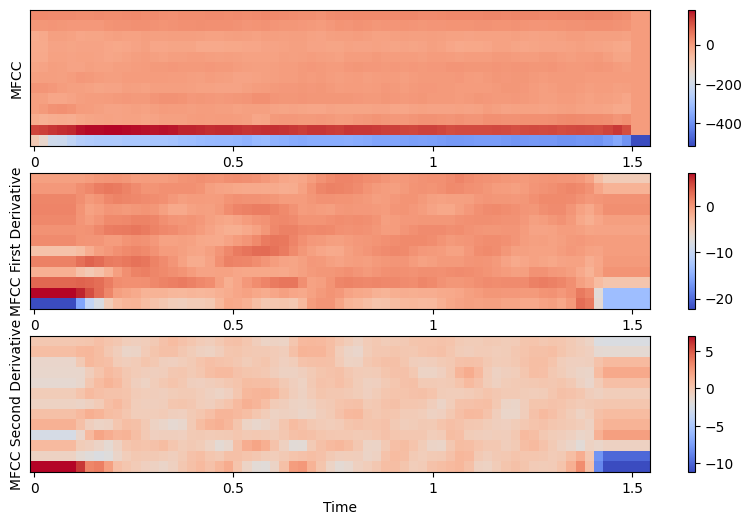

In [16]:
plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
librosa.display.specshow(mfcc, x_axis='time')
plt.colorbar()
plt.ylabel('MFCC')


plt.subplot(3, 1, 2)
librosa.display.specshow(delta_mfcc, x_axis='time')
plt.colorbar()
plt.ylabel('MFCC First Derivative')


plt.subplot(3, 1, 3)
librosa.display.specshow(delta2_mfcc, x_axis='time', sr=sr)
plt.colorbar()
plt.ylabel('MFCC Second Derivative')


plt.show()


2nd set of question

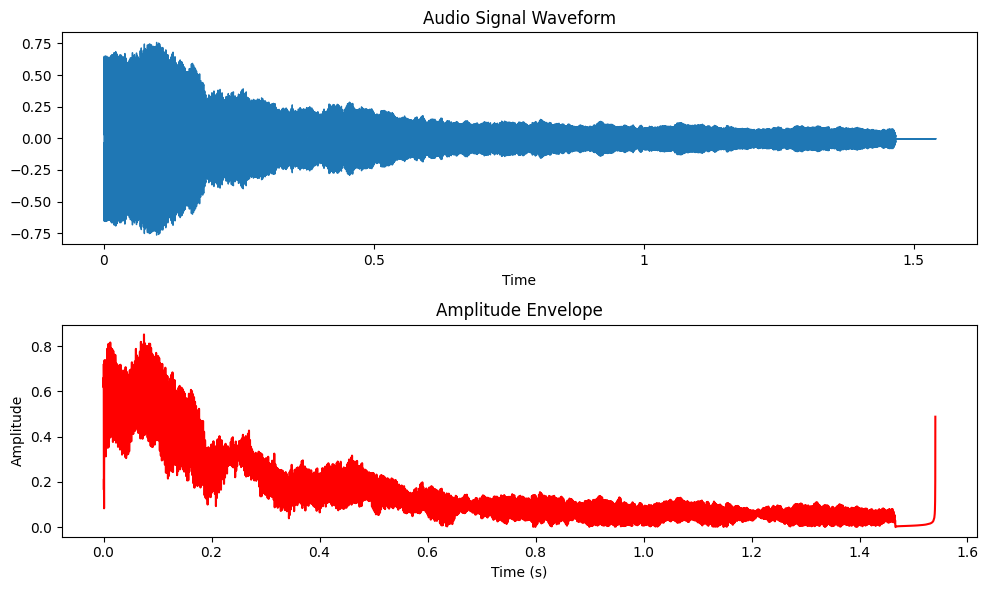

In [17]:
#Plot the amplitude envelope of an audio signal
# Calculate the amplitude envelope using Hilbert transform
from scipy.signal import hilbert
y=audio
analytic_signal = hilbert(y)
amplitude_envelope = np.abs(analytic_signal)

# Plot the waveform and its amplitude envelope
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.title("Audio Signal Waveform")
librosa.display.waveshow(y, sr=sr)

plt.subplot(2, 1, 2)
plt.title("Amplitude Envelope")
plt.plot(np.arange(len(y)) / sr, amplitude_envelope, color='r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

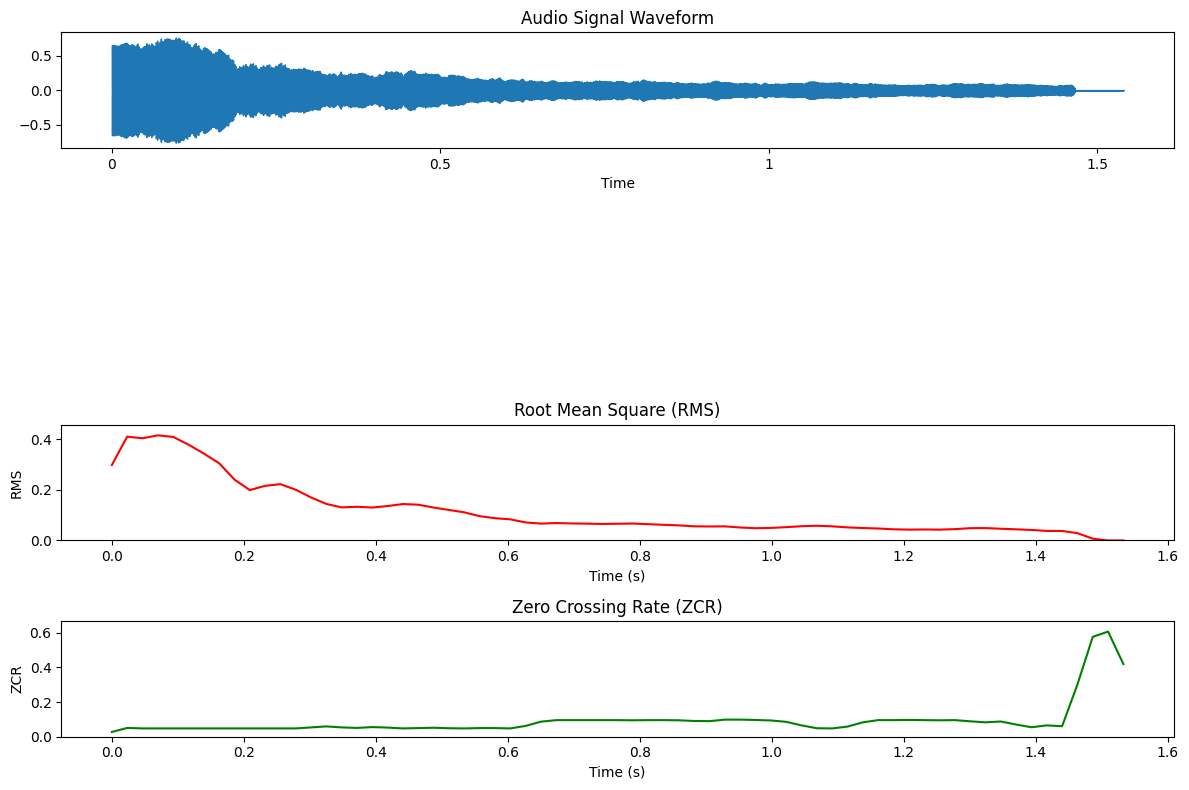

In [23]:
#Calculate and plot RMS and ZCR for the audio signal
# Calculate Root Mean Square (RMS)
frame_length = 1024
hop_length = 512
rms = np.sqrt(np.mean(librosa.feature.rms(y=y, frame_length=frame_length, hop_length=hop_length)**2, axis=0))

# Calculate Zero Crossing Rate (ZCR)
zcr = librosa.feature.zero_crossing_rate(y, frame_length=frame_length, hop_length=hop_length)[0]

# Plot the waveform, amplitude envelope, RMS, and ZCR
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.title("Audio Signal Waveform")
librosa.display.waveshow(y, sr=sr)


plt.subplot(4, 1, 3)
plt.title("Root Mean Square (RMS)")
plt.plot(np.arange(len(rms)) * hop_length / sr, rms, color='r')
plt.xlabel('Time (s)')
plt.ylabel('RMS')
plt.ylim(0, np.max(rms) * 1.1)

plt.subplot(4, 1, 4)
plt.title("Zero Crossing Rate (ZCR)")
plt.plot(np.arange(len(zcr)) * hop_length / sr, zcr, color='g')
plt.xlabel('Time (s)')
plt.ylabel('ZCR')
plt.ylim(0, np.max(zcr) * 1.1)

plt.tight_layout()
plt.show()

3rd set of questions

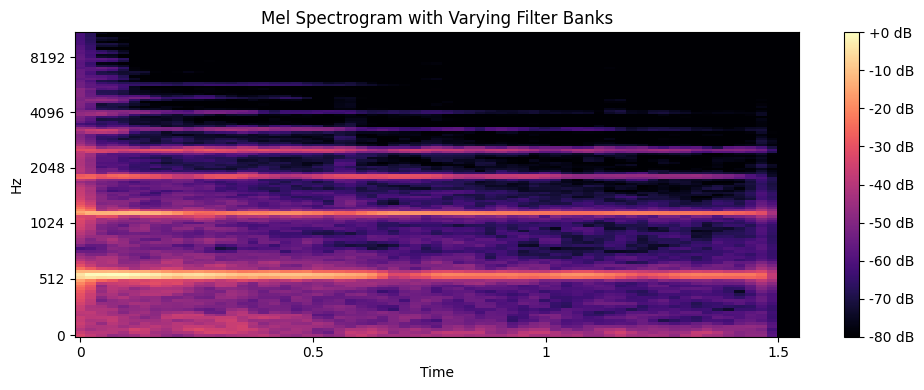

In [24]:
#calculate and visualize mel spectogram with varying  filter bank
n_fft = 2048
hop_length = 512
n_mels = 128
fmin = 20
fmax = 8000

# Create Mel spectrogram with varying filter banks
S = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length,
                                   n_mels=n_mels, fmin=fmin, fmax=fmax)

# Convert power spectrogram to dB
S_dB = librosa.power_to_db(S, ref=np.max)

# Visualize the Mel spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(S_dB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram with Varying Filter Banks')
plt.tight_layout()
plt.show()

4th set of question

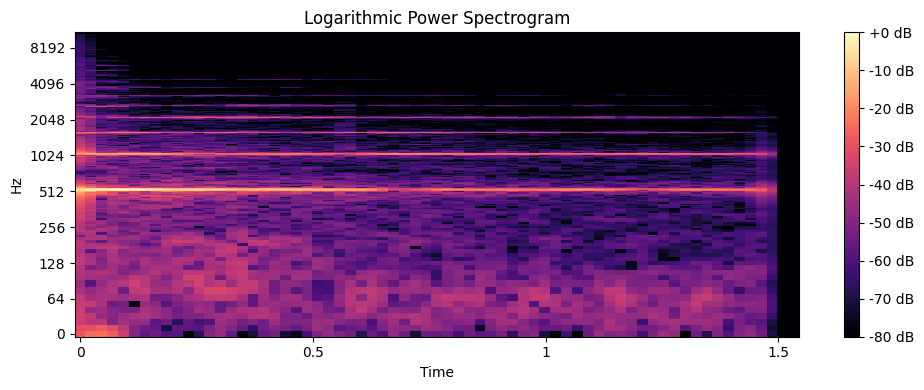

In [25]:
#Visualize logarithmic power of a signal
# Compute the power spectrogram
S = np.abs(librosa.stft(y))**2

# Convert power spectrogram to dB scale
log_power = librosa.power_to_db(S, ref=np.max)

# Visualize the logarithmic power
plt.figure(figsize=(10, 4))
librosa.display.specshow(log_power, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Logarithmic Power Spectrogram')
plt.tight_layout()
plt.show()